# SVM / SVR for Age Classification

In this task we compare different SVM / SVR model for age classification task

In [1]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd 

In [2]:
df = pd.read_csv('blogtext.csv')

In [3]:
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


delete unnecessary columns

In [5]:
df.drop(['id','date', 'sign', 'topic'], axis=1, inplace=True)

**Some stats about gender:**

In [6]:
df['gender'].describe()

count     681284
unique         2
top         male
freq      345193
Name: gender, dtype: object

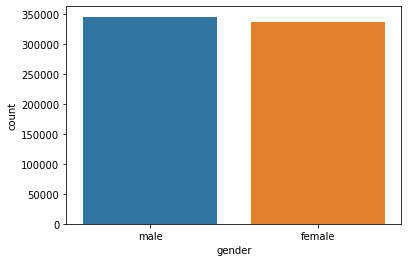

In [7]:
sns.countplot(x="gender", data=df)

**Age:**

In [8]:
df['age'].describe()

count    681284.000000
mean         23.932326
std           7.786009
min          13.000000
25%          17.000000
50%          24.000000
75%          26.000000
max          48.000000
Name: age, dtype: float64

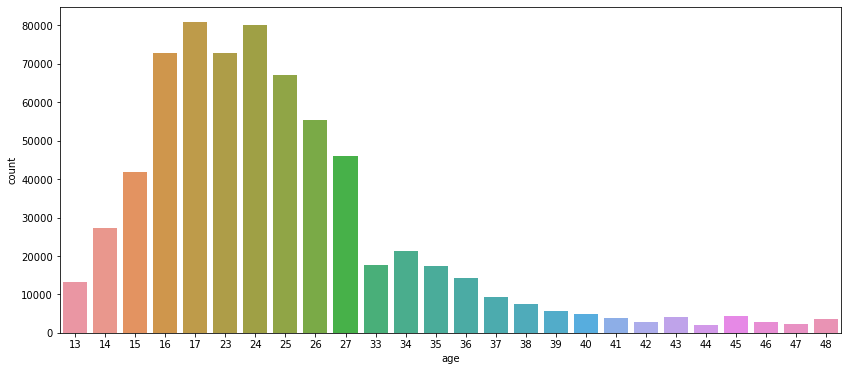

In [9]:
plt.figure(figsize = (14,6))
sns.countplot(x="age", data=df)

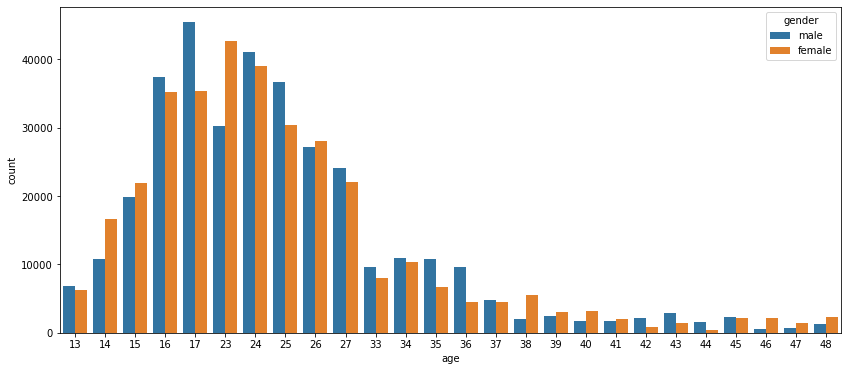

In [10]:
plt.figure(figsize = (14,6))
sns.countplot(x="age", hue="gender", data=df, )

**let's see how long text of blog posts are**

In [11]:
df['number of words'] = df['text'].apply( lambda text: len(text.split()))

In [12]:
df['number of words'].describe()

count    681284.000000
mean        200.786742
std         415.160622
min           0.000000
25%          37.000000
50%         112.000000
75%         255.000000
max      131169.000000
Name: number of words, dtype: float64

In [13]:
empty_text = len(df[df['number of words'] == 0])
print(f'number of empty texts: { empty_text }')

number of empty texts: 3119


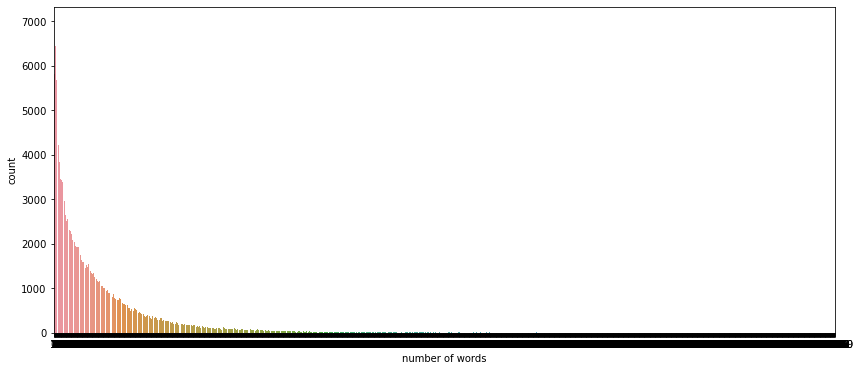

In [14]:
#df['trimmed number of words'] = df['number of words'].apply(lambda x: min(x, 1000))

plt.figure(figsize = (14,6))
sns.countplot(x="number of words", data=df, orient = 'h')

In [15]:
df['gender'] = df['gender'].apply(lambda gender: gender == 'male')

In [16]:
data, target = df.drop(['age'], axis=1), df['age']

In [17]:
data_part = data[::10]
target_part = target[::10]

Split data on train and test

In [18]:
from sklearn.model_selection import train_test_split
data_train, data_test, y_train, y_test = train_test_split(data_part, target_part, test_size=0.2, random_state=42)

Add gender information to text. 

In [19]:
def add_binary_type(texts, mask, false_elem, true_elem):
    return [text + true_elem if conditional else text + false_elem for text, conditional, in zip(texts, mask)]

In [20]:
texts_train = add_binary_type(data_train['text'], data_train['gender'], 'man_token', 'woman_token')

In [21]:
texts_test = add_binary_type(data_test['text'], data_test['gender'], 'man_token', 'woman_token')

In [22]:
texts_train[0]

"                I shll always ponder...until the day I die.  I was at CYT all day. It was almost scary. Like when Jenny popped out of a corner and was like 'LAURA!' and scared me so bad I triped and ran into a microphone stand and made it fall over. Bekah just laughed. Haha. Then this one guy named Jermey was like 'Come sell popcorn with me!' andI was like 'No thanks...' Even though he cut his mullet he will eternally scare me. Then he liked grabbed my shirt and was like 'COME SELLL POPPED CORN WITH ME!' so I kicked him and ran away. Freako rapist.  At the end of the second show Jacelin (I totally cannot spell her name!) and I we hidding in the balconey and whenever Bekah would pass by we would yell 'BEKKKKKKAHHHHHH!!!!!'  then hide behind the railing. She never even noticed. Haha. So then we told her afterwords what we did and she was like 'You did??' she laughed.   I found out who my sisters secret pal is! Its Jauclin!! and Hannah thinks its Taylor. Hahah.   I like knowing things ot

In [23]:
def age_group(age):
    if age < 20:
        return 0
    elif age < 30:
        return 1
    return 2 

In [24]:
y_train_group = np.array([age_group(y) for y in y_train])
y_test_group = np.array([age_group(y) for y in y_test])

(array([18888.,     0.,     0.,     0.,     0., 25694.,     0.,     0.,
            0.,  9921.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

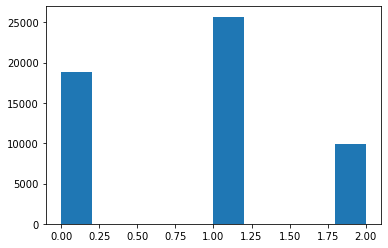

In [25]:
plt.hist(y_train_group)

In [26]:
NUM_CLASESS = 3

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer(min_df = 2, max_df=0.85)
X_train_bow = vectorizer.fit_transform(texts_train)
X_test_bow = vectorizer.transform(texts_test)

In [28]:
'man_token' in vectorizer.vocabulary_, 'woman_token' in vectorizer.vocabulary_

(True, True)

Transform text to features using BOW and tf-idf. 

In [29]:
vectorizer_tf_idf = TfidfVectorizer(min_df = 2, max_df=0.85)
X_train_tf_idf = vectorizer_tf_idf.fit_transform(texts_train)
X_test_tf_idf = vectorizer_tf_idf.transform(texts_test)

In [30]:
vectorizer_bigram = CountVectorizer(min_df = 2, max_df=0.85, ngram_range = (2,2))
X_train_bigram = vectorizer_bigram.fit_transform(texts_train)
X_test_bigram = vectorizer_bigram.transform(texts_test)

We will compare different ways to fit svm. Let's start with simple SVM with different parametr C.

In [57]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, plot_confusion_matrix, cohen_kappa_score

def apply_model(name, X, y, model, convert_to_binary = False):
    y_pred = model.predict(X)
    if convert_to_binary:
        y_pred = [age_group(age) for age in y_pred]
    else:   
        plot_confusion_matrix(model, X, y, labels = [0,1,2])
    print(f'{name} results:')
    print(f"Model accuracy: {accuracy_score(y, y_pred):.3f}")
    print(f"Model kappa score: {cohen_kappa_score(y, y_pred):.3f}")

In [77]:
from sklearn import svm

svm_model = svm.LinearSVC(C=1.0, max_iter = 1e3)

In [78]:
%%time
svm_model.fit(X_train_bow, y_train_group)

CPU times: user 51.2 s, sys: 54.5 ms, total: 51.2 s
Wall time: 51.3 s


LinearSVC(max_iter=1000.0)

linear model simple  results:
Model accuracy: 0.588
Model kappa score: 0.338


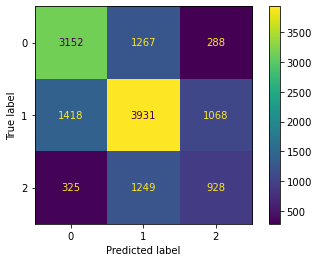

In [79]:
apply_model('linear model simple ', X_test_bow, y_test_group, svm_model, convert_to_binary = False)

In [80]:
svm_model2 = svm.LinearSVC(C=0.1, max_iter = 1e3)

In [81]:
%%time
svm_model2.fit(X_train_bow, y_train_group)

CPU times: user 1min, sys: 165 ms, total: 1min
Wall time: 1min


LinearSVC(C=0.1, max_iter=1000.0)

linear model simple  results:
Model accuracy: 0.617
Model kappa score: 0.371


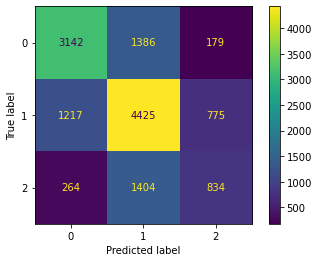

In [83]:
apply_model('linear model simple ', X_test_bow, y_test_group, svm_model2, convert_to_binary = False)

linear model simple  results:
Model accuracy: 0.627
Model kappa score: 0.351


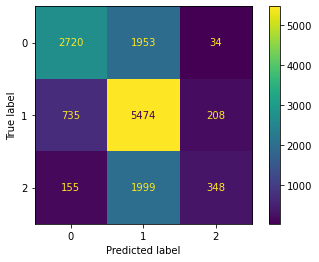

In [84]:
svm_model3 = svm.LinearSVC(C=0.001, max_iter = 1e3)
svm_model3.fit(X_train_bow, y_train_group)
apply_model('linear model simple ', X_test_bow, y_test_group, svm_model3, convert_to_binary = False)

So, here smaller C is better. 

But what will be if we try to predict an exact age instead of predicting age group?

In [93]:
%%time
svr = svm.LinearSVR(C=1, max_iter = 1e3)
svr.fit(X_train_bow, y_train)
apply_model('linear model simple ', X_test_bow, y_test_group, svr, convert_to_binary = True)

linear model simple  results:
Model accuracy: 0.529
Model kappa score: 0.205
CPU times: user 29.1 s, sys: 76.7 ms, total: 29.2 s
Wall time: 29.3 s


In [94]:
%%time
svr = svm.LinearSVR(C=0.1, max_iter = 1e3)
svr.fit(X_train_bow, y_train)
apply_model('linear model simple ', X_test_bow, y_test_group, svr, convert_to_binary = True)

linear model simple  results:
Model accuracy: 0.556
Model kappa score: 0.212
CPU times: user 25.1 s, sys: 73.8 ms, total: 25.1 s
Wall time: 25.2 s


In [95]:
%%time
svr = svm.LinearSVR(C=0.001, max_iter = 1e3)
svr.fit(X_train_bow, y_train)
apply_model('linear model simple ', X_test_bow, y_test_group, svr, convert_to_binary = True)

linear model simple  results:
Model accuracy: 0.533
Model kappa score: 0.231
CPU times: user 3.65 s, sys: 53.7 ms, total: 3.7 s
Wall time: 3.71 s


Anouther way to train our model is to say that despite the fact that we have a classification task let's fit a regression model!

In [96]:
%%time
svr2 = svm.LinearSVR(C=1, max_iter = 1e3)
svr2.fit(X_train_bow, y_train_group)

y_pred =  [int(y + 0.5) for y in svr2.predict(X_test_bow)] 
print(f"Model accuracy: {accuracy_score(y_test_group, y_pred):.3f}")
print(f"Model kappa score: {cohen_kappa_score(y_test_group, y_pred):.3f}")

Model accuracy: 0.436
Model kappa score: 0.124
CPU times: user 28.3 s, sys: 66.6 ms, total: 28.4 s
Wall time: 28.4 s


In [97]:
%%time
svr2 = svm.LinearSVR(C=0.1, max_iter = 1e3)
svr2.fit(X_train_bow, y_train_group)

y_pred =  [int(y + 0.5) for y in svr2.predict(X_test_bow)] 
print(f"Model accuracy: {accuracy_score(y_test_group, y_pred):.3f}")
print(f"Model kappa score: {cohen_kappa_score(y_test_group, y_pred):.3f}")

Model accuracy: 0.513
Model kappa score: 0.182
CPU times: user 27.9 s, sys: 78.3 ms, total: 28 s
Wall time: 28 s


In [98]:
%%time
svr2 = svm.LinearSVR(C=0.001, max_iter = 1e3)
svr2.fit(X_train_bow, y_train_group)

y_pred =  [int(y + 0.5) for y in svr2.predict(X_test_bow)] 
print(f"Model accuracy: {accuracy_score(y_test_group, y_pred):.3f}")
print(f"Model kappa score: {cohen_kappa_score(y_test_group, y_pred):.3f}")

Model accuracy: 0.536
Model kappa score: 0.150
CPU times: user 12.9 s, sys: 55 ms, total: 13 s
Wall time: 13 s
